# Proyecto 8: Análisis de Negocio

# Paso 1

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para que tu proyecto tenga mejor orden y claridad te recomiendo siempre incluir un título y un breve resúmen de lo que tratará el proyecto para que quien decida continuar tu trabajo pueda entender el objetivo del mismo
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Añadi el titulo en la parte superior, muchas gracias!
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
visit_log_us = pd.read_csv('/datasets/visits_log_us.csv')
orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')
costs_us = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visit_log_us.info()
print()
orders_log_us.info()
print()
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  

In [51]:
visit_log_us.describe()

,Source Id,Uid,Session Duration
count,359400.000000,3.594000e+05,359400.000000
mean,3.750515,9.202557e+18,643.025687
std,1.917116,5.298433e+18,997.127761
min,1.000000,1.186350e+13,-2760.000000
25%,3.000000,4.613407e+18,120.000000
50%,4.000000,9.227413e+18,300.000000
75%,5.000000,1.372824e+19,840.000000
max,10.000000,1.844668e+19,42660.000000


In [52]:
orders_log_us.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [53]:
costs_us.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [4]:
# Convertir las columnas de fecha y hora al tipo de datos datetime
visit_log_us['Start Ts'] = pd.to_datetime(visit_log_us['Start Ts'])
visit_log_us['End Ts'] = pd.to_datetime(visit_log_us['End Ts'])
orders_log_us['Buy Ts'] = pd.to_datetime(orders_log_us['Buy Ts'])
costs_us['dt'] = pd.to_datetime(costs_us['dt'])

In [5]:
visit_log_us.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
orders_log_us.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
costs_us.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


# Paso 2

# Visitas

¿Cuántas personas lo usan cada día, semana y mes?

In [8]:
# Cantidad de usuarios únicos por día
daily_users = visit_log_us.groupby(visit_log_us['Start Ts'].dt.date)['Uid'].nunique()
print(daily_users)

Start Ts
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: Uid, Length: 364, dtype: int64


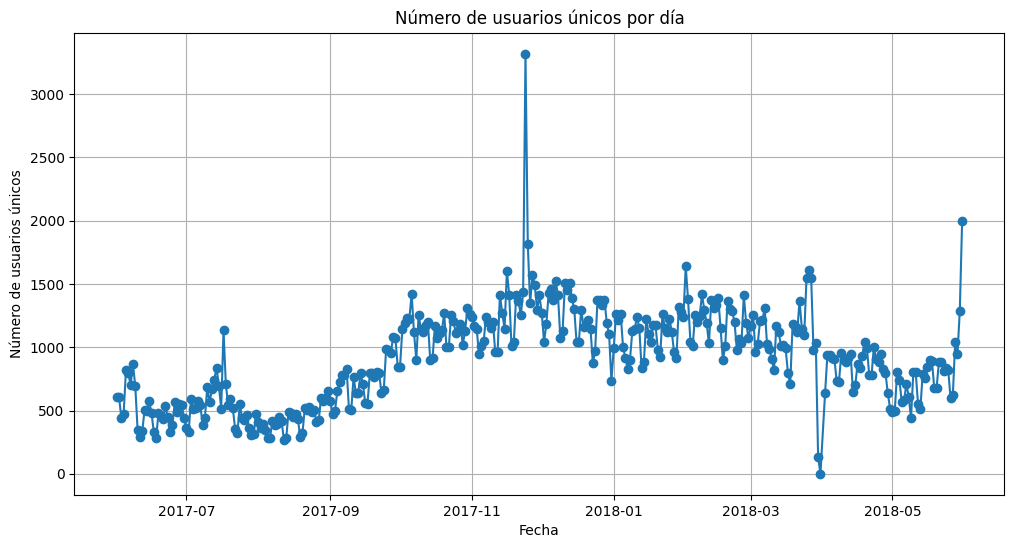

In [9]:
#Graficar datos
plt.figure(figsize=(12, 6))
plt.plot(daily_users.index, daily_users.values, marker='o', linestyle='-')
plt.title('Número de usuarios únicos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de usuarios únicos')
plt.grid(True)
plt.show()

In [10]:
# Cantidad de usuarios únicos por semana
weekly_users = visit_log_us.groupby(visit_log_us['Start Ts'].dt.to_period('W'))['Uid'].nunique()
print(weekly_users)

Start Ts
2017-05-29/2017-06-04     2021
2017-06-05/2017-06-11     4129
2017-06-12/2017-06-18     2812
2017-06-19/2017-06-25     2878
2017-06-26/2017-07-02     3064
2017-07-03/2017-07-09     3294
2017-07-10/2017-07-16     4355
2017-07-17/2017-07-23     3841
2017-07-24/2017-07-30     2655
2017-07-31/2017-08-06     2364
2017-08-07/2017-08-13     2444
2017-08-14/2017-08-20     2746
2017-08-21/2017-08-27     3116
2017-08-28/2017-09-03     3694
2017-09-04/2017-09-10     4412
2017-09-11/2017-09-17     4319
2017-09-18/2017-09-24     4874
2017-09-25/2017-10-01     6241
2017-10-02/2017-10-08     7612
2017-10-09/2017-10-15     7074
2017-10-16/2017-10-22     7148
2017-10-23/2017-10-29     7401
2017-10-30/2017-11-05     7480
2017-11-06/2017-11-12     7179
2017-11-13/2017-11-19     8117
2017-11-20/2017-11-26    10586
2017-11-27/2017-12-03     8166
2017-12-04/2017-12-10     8407
2017-12-11/2017-12-17     8214
2017-12-18/2017-12-24     7172
2017-12-25/2017-12-31     7774
2018-01-01/2018-01-07     6918

In [11]:
# Convertir el índice a datetime para su uso en el gráfico
weekly_users.index = weekly_users.index.to_timestamp()

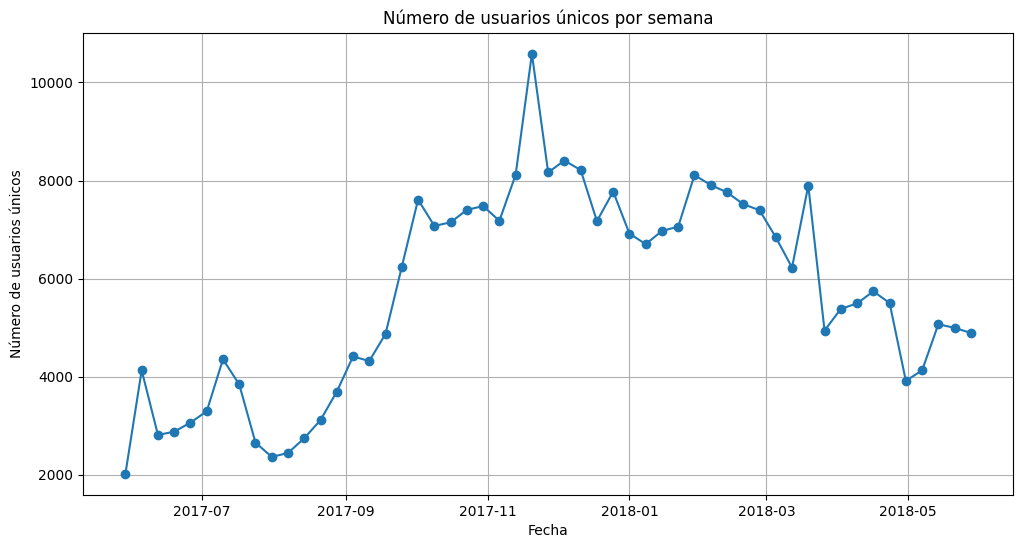

In [12]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(weekly_users.index, weekly_users.values, marker='o', linestyle='-')
plt.title('Número de usuarios únicos por semana')
plt.xlabel('Fecha')
plt.ylabel('Número de usuarios únicos')
plt.grid(True)
plt.show()

In [13]:
# Cantidad de usuarios únicos por mes
monthly_users = visit_log_us.groupby(visit_log_us['Start Ts'].dt.to_period('M'))['Uid'].nunique()
print(monthly_users)

Start Ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
2017-11    32797
2017-12    31557
2018-01    28716
2018-02    28749
2018-03    27473
2018-04    21008
2018-05    20701
Freq: M, Name: Uid, dtype: int64


In [14]:
# Convertir el índice a datetime para su uso en el gráfico
monthly_users.index = monthly_users.index.to_timestamp()

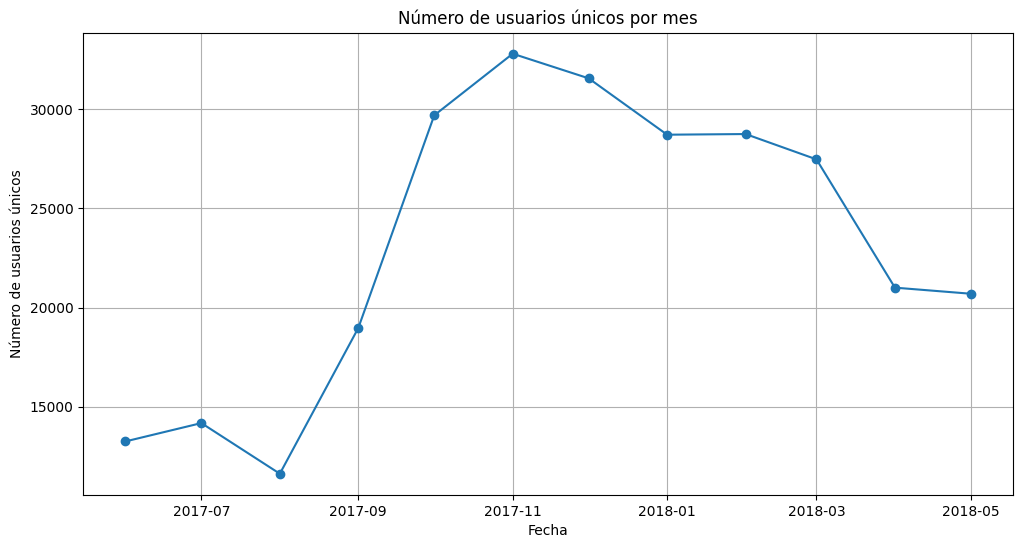

In [15]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(monthly_users.index, monthly_users.values, marker='o', linestyle='-')
plt.title('Número de usuarios únicos por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de usuarios únicos')
plt.grid(True)
plt.show()

Considerando los datos proporcionados, podemos ver un aumento considerable de la cantidad de usuarios unicos a partir del mes de agosto 2017, alcanzando su punto mas alto en noviembre de 2017. Considerando las fechas podemos inferir que el alza de usuarios unicos se debe a la tendencia de comprar mas en esos meses debido a las fechas festivas desde octubre hasta febrero. 

¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [16]:
# Cantidad de sesiones por día
daily_sessions = visit_log_us.groupby(visit_log_us['Start Ts'].dt.date)['Uid'].count()
print(daily_sessions)

Start Ts
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: Uid, Length: 364, dtype: int64


¿Cuál es la duración de cada sesión?

In [17]:
# Duración de cada sesión (en segundos)
visit_log_us['Session Duration'] = (visit_log_us['End Ts'] - visit_log_us['Start Ts']).dt.total_seconds()

In [18]:
# Gráfico de duración promedio de sesión por día
avg_session_duration = visit_log_us.groupby(visit_log_us['Start Ts'].dt.date)['Session Duration'].mean()
print(avg_session_duration)

Start Ts
2017-06-01    666.320783
2017-06-02    619.840426
2017-06-03    606.958071
2017-06-04    554.309804
2017-06-05    624.450168
                 ...    
2018-05-27    556.964286
2018-05-28    632.819204
2018-05-29    629.428019
2018-05-30    640.707801
2018-05-31    739.752660
Name: Session Duration, Length: 364, dtype: float64


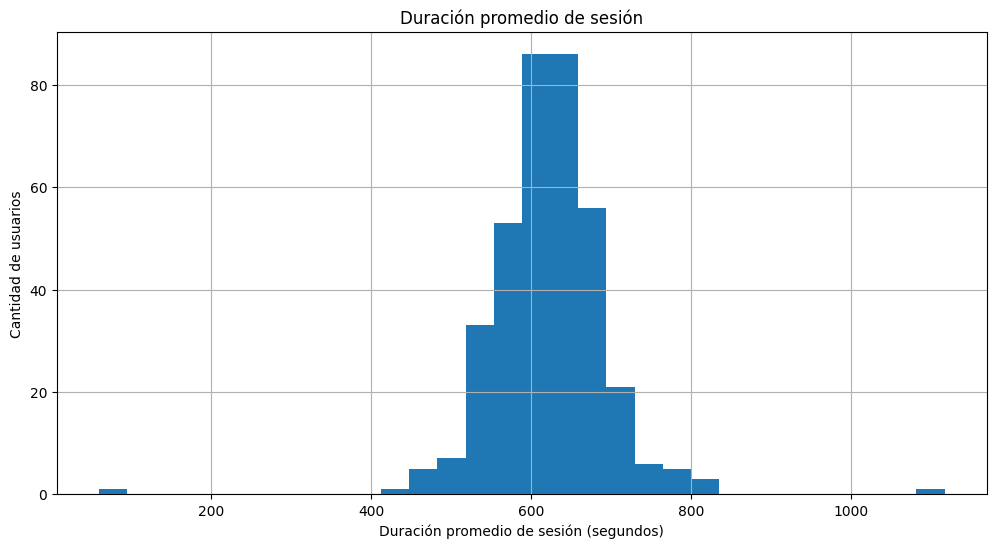

In [19]:
avg_session_duration.hist(bins=30, figsize=(12, 6))
plt.title('Duración promedio de sesión')
plt.xlabel('Duración promedio de sesión (segundos)')
plt.ylabel('Cantidad de usuarios')
plt.show()

La grafica anterior nos muestra la duracion promedio de una sesion por cantidad de usuarios. Podemos ver que el promedio de duracion de cada sesion es alrededor de los 600 segundos o 10 minutos, por lo que debemos considerar que ese tiempo es el que usuario dispone a observar, comparar y comprar cosas dentro de la pagina.

# Ventas

¿Cuándo la gente empieza a comprar?

In [20]:
# Obtener la fecha de registro más antigua (primera visita) de cada usuario
fecha_registro = visit_log_us.groupby('Uid')['Start Ts'].min().reset_index()
fecha_registro.columns = ['Uid', 'Fecha Registro']

In [21]:
# Obtener la fecha de la primera compra de cada usuario
fecha_primera_compra = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
fecha_primera_compra.columns = ['Uid', 'Fecha Primera Compra']


In [22]:
# Combinar los dos DataFrames en base al 'Uid'
registro_compra = pd.merge(fecha_registro, fecha_primera_compra, on='Uid', how='inner')

In [23]:
# Calcular el tiempo transcurrido entre el registro y la primera compra
registro_compra['Tiempo Conversion'] = (registro_compra['Fecha Primera Compra'] - registro_compra['Fecha Registro']).dt.days

In [24]:
# Mostrar algunas estadísticas
conversion_stats = registro_compra['Tiempo Conversion'].describe()
print(conversion_stats)

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: Tiempo Conversion, dtype: float64


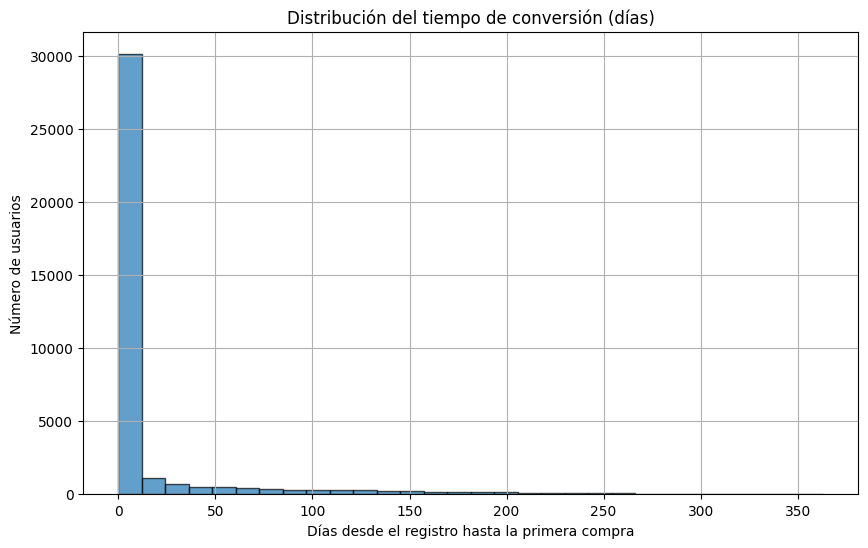

In [25]:
# Graficar la distribución del tiempo de conversión
plt.figure(figsize=(10, 6))
plt.hist(registro_compra['Tiempo Conversion'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución del tiempo de conversión (días)')
plt.xlabel('Días desde el registro hasta la primera compra')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.show()

Con los datos obtenidos podemos observar que los clientes suelen hacer su primera compra en la pagina durante el primer mes de haberse registrado, teniendo que en promedio los usuarios hacen su primera compra alrededor del dia numero 16 tras registrarse.

¿Cuántos pedidos hacen durante un período de tiempo dado?
¿Cuál es el tamaño promedio de compra?

In [26]:
# Definir el período de tiempo (por ejemplo, todo junio de 2017)
start_date = '2017-06-01'
end_date = '2017-06-30'

In [27]:
# Filtrar los datos de compras dentro de ese período
compras_periodo = orders_log_us[(orders_log_us['Buy Ts'] >= start_date) & 
                                (orders_log_us['Buy Ts'] <= end_date)]

In [28]:
# Contar el número de pedidos por usuario durante ese período
pedidos_por_usuario = compras_periodo.groupby('Uid')['Buy Ts'].count().reset_index()
pedidos_por_usuario.columns = ['Uid', 'Numero_Pedidos']

In [29]:
# Contar el número de usuarios por cantidad de pedidos
conteo_pedidos = pedidos_por_usuario['Numero_Pedidos'].value_counts().sort_index()

print("Numero de pedidos por usuario")
print(conteo_pedidos)
print()
print("El total de pedidos en el periodo 2017-06-01 a 2017-06-30 fue de = ", conteo_pedidos.sum())

Numero de pedidos por usuario
1     1723
2      181
3       33
4        8
5        4
6        2
11       1
13       1
Name: Numero_Pedidos, dtype: int64

El total de pedidos en el periodo 2017-06-01 a 2017-06-30 fue de =  1953


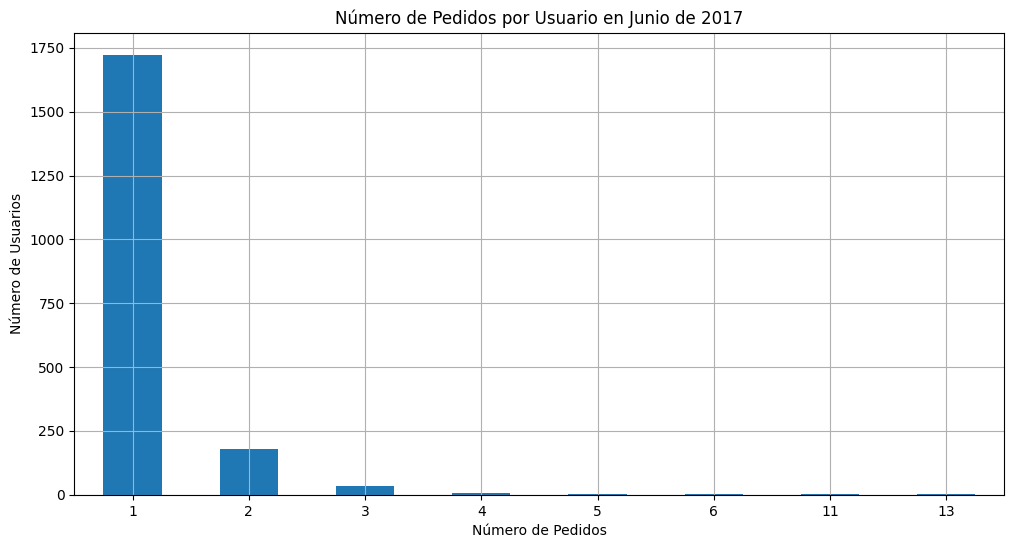

In [30]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
conteo_pedidos.plot(kind='bar')
plt.title('Número de Pedidos por Usuario en Junio de 2017')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Los resultados dentro del periodo seleccionado (Junio de 2017) muestra que de un total de pedidos de 1953, 1723 pedidos fueron realizados una vez por usuario, esto vendria siendo el 88.22% del total de pedidos. Con los datos mostrados el numero de pedidos mas popular por mes vendria siendo solo 1 pedido.

¿Cuánto dinero traen? (LTV)*****

In [31]:
orders_log_us['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

In [32]:
# Encontrar la fecha de la primera compra de cada cliente

first_orders = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'First Buy Ts']

In [33]:
# Calcular el número de nuevos clientes para cada fecha (o rango de fechas, en este caso, para cada mes)

first_orders['First Buy Ts'] = pd.to_datetime(first_orders['First Buy Ts'])
first_orders['Month'] = first_orders['First Buy Ts'].dt.to_period('M')
new_customers = first_orders.groupby('Month')['Uid'].count().reset_index()

In [34]:
# Añadir el mes del primer pedido a la tabla de pedidos

orders_log_us['Buy Ts'] = pd.to_datetime(orders_log_us['Buy Ts'])
orders_log_us['Month'] = orders_log_us['Buy Ts'].dt.to_period('M')
orders = orders_log_us.merge(first_orders[['Uid', 'Month']], on='Uid', suffixes=('', '_first'))

In [35]:
orders

,Buy Ts,Revenue,Uid,Month,Month_first
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018-05


In [36]:
# Calcular el numero de clientes para cada mes

cohort_sizes = first_orders.groupby('First Buy Ts').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['Month_first', "n_buyers"]
cohort_sizes['Month_first'] = cohort_sizes['Month_first'].dt.to_period('M')
cohort_sizes.head()

,Month_first,n_buyers
0,2017-06,1
1,2017-06,1
2,2017-06,1
3,2017-06,1
4,2017-06,1


In [37]:
# Agrupar la tabla de pedidos por mes de la primera compra y mes de la compra, y totalizar ingresos

cohorts = orders.groupby(['Month_first', 'Month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,Month_first,Month,Revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


In [38]:
report = pd.merge(cohort_sizes, cohorts, on= 'Month_first')
report.head()

,Month_first,n_buyers,Month,Revenue
0,2017-06,1,2017-06,9557.49
1,2017-06,1,2017-07,981.82
2,2017-06,1,2017-08,885.34
3,2017-06,1,2017-09,1931.30
4,2017-06,1,2017-10,2068.58


In [39]:
report['age'] = (report['Month'].dt.year - report['Month_first'].dt.year) * 12 + (report['Month'].dt.month - report['Month_first'].dt.month)

report['age'] = report['age'].round().astype('int')

margin_rate = 0.5
report['gp'] = report['Revenue'] * margin_rate


report.head()

,Month_first,n_buyers,Month,Revenue,age,gp
0,2017-06,1,2017-06,9557.49,0,4778.745
1,2017-06,1,2017-07,981.82,1,490.910
2,2017-06,1,2017-08,885.34,2,442.670
3,2017-06,1,2017-09,1931.30,3,965.650
4,2017-06,1,2017-10,2068.58,4,1034.290


In [40]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index= 'Month_first', columns= 'age', values= 'ltv', aggfunc= 'mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
Month_first,,,,,,,,,,,,
2017-06,4685.0,481.0,434.0,947.0,1014.0,729.0,942.0,577.0,549.0,601.0,566.0,255.0
2017-07,5644.0,315.0,586.0,337.0,166.0,147.0,113.0,133.0,151.0,138.0,146.0,
2017-08,3561.0,319.0,309.0,264.0,333.0,191.0,142.0,273.0,197.0,127.0,,
2017-09,7119.0,1410.0,657.0,5014.0,505.0,816.0,885.0,307.0,232.0,,,
2017-10,10424.0,1116.0,399.0,327.0,316.0,251.0,177.0,241.0,,,,
2017-11,10067.0,780.0,390.0,635.0,289.0,105.0,224.0,,,,,
2017-12,9993.0,549.0,1951.0,2247.0,660.0,713.0,,,,,,
2018-01,6769.0,482.0,498.0,234.0,103.0,,,,,,,
2018-02,7311.0,489.0,138.0,130.0,,,,,,,,


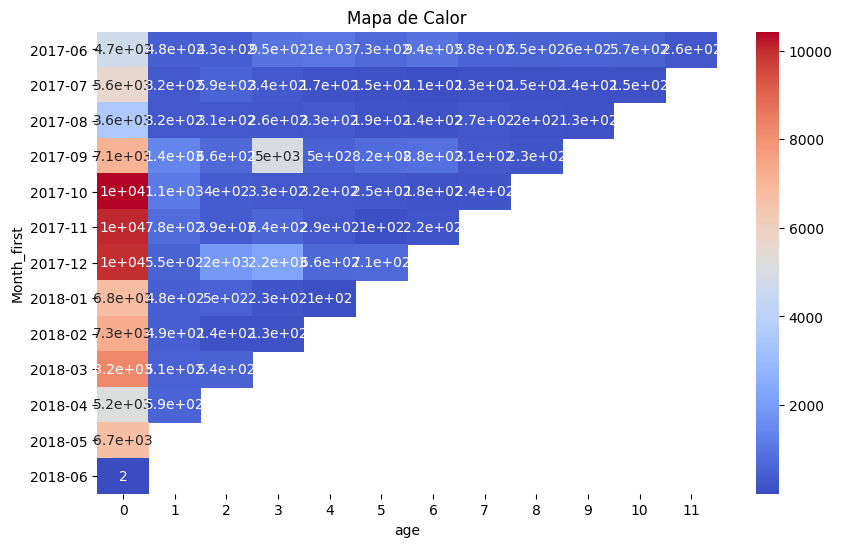

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(output, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor')
plt.show()

In [41]:
# Encontremos el LTV de la primera cohorte sumando el valor de cada mes

ltv_201706 = output.loc['2017-06'].sum()
ltv_201706

11780.0

In [42]:
report.head()

,Month_first,n_buyers,Month,Revenue,age,gp,ltv
0,2017-06,1,2017-06,9557.49,0,4778.745,4778.745
1,2017-06,1,2017-07,981.82,1,490.910,490.910
2,2017-06,1,2017-08,885.34,2,442.670,442.670
3,2017-06,1,2017-09,1931.30,3,965.650,965.650
4,2017-06,1,2017-10,2068.58,4,1034.290,1034.290


# Marketing

¿Cuánto dinero se gastó?

In [43]:
# Agrupar por año y mes y sumar los costos
monthly_costs = costs_us.groupby(costs_us['dt'].dt.to_period('M'))['costs'].sum().reset_index()
monthly_costs.columns = ['Mes', 'Total Costos']

In [44]:
print(monthly_costs)

        Mes  Total Costos
0   2017-06      18015.00
1   2017-07      18240.59
2   2017-08      14790.54
3   2017-09      24368.91
4   2017-10      36322.88
5   2017-11      37907.88
6   2017-12      38315.35
7   2018-01      33518.52
8   2018-02      32723.03
9   2018-03      30415.27
10  2018-04      22289.38
11  2018-05      22224.27


¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [45]:
# Agrupar por fuente y sumar los costos
costs_us['year_month'] = costs_us['dt'].dt.to_period('Y')
source_costs = costs_us.groupby(['source_id', 'year_month'])['costs'].sum().reset_index()
source_costs.columns = ['Fuente','Año','Total Costos']

In [46]:
print(source_costs)

    Fuente   Año  Total Costos
0        1  2017      11754.42
1        1  2018       9078.85
2        2  2017      24547.68
3        2  2018      18258.36
4        3  2017      80495.21
5        3  2018      60826.42
6        4  2017      34944.28
7        4  2018      26129.32
8        5  2017      29613.94
9        5  2018      22143.16
10       9  2017       3202.88
11       9  2018       2314.61
12      10  2017       3402.74
13      10  2018       2419.75


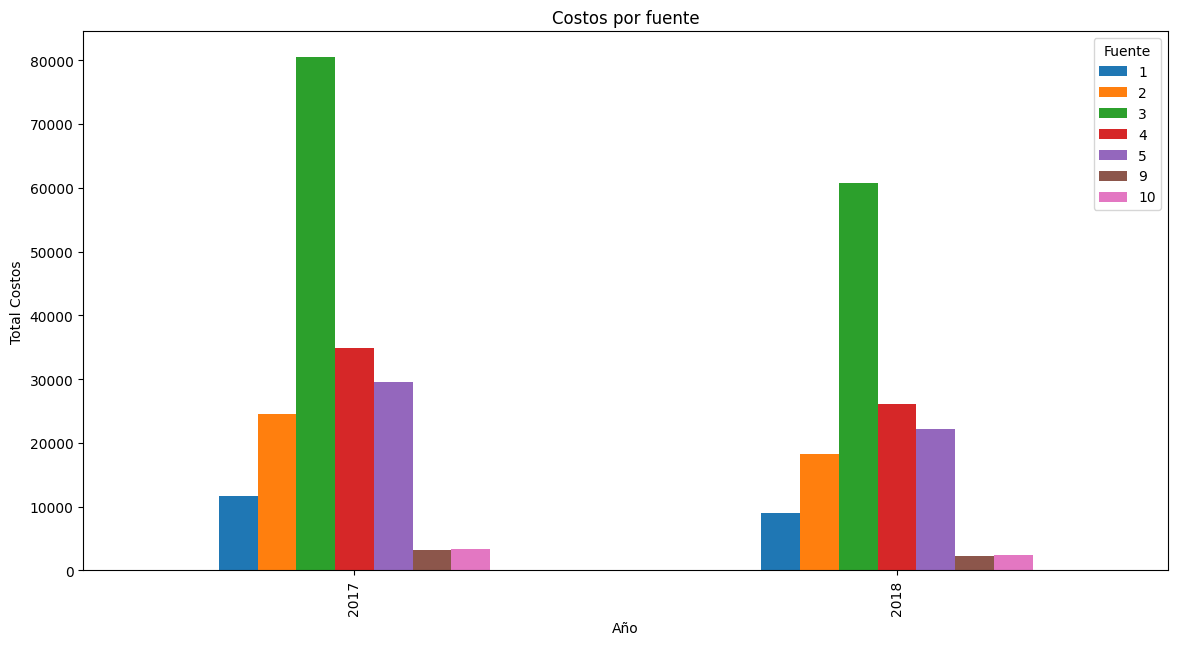

In [47]:
# Gráfico de total de costos por fuente

pivot_costs = source_costs.pivot(index='Año', columns= 'Fuente',values='Total Costos' )

pivot_costs.plot(kind='bar', figsize=(14, 7))
plt.title('Costos por fuente')
plt.xlabel('Año')
plt.ylabel('Total Costos')
plt.show()

Podemos ver claramente que la empresa destina la mayor parte de sus costos a la fuente numero 3 con un total de 141,321.63  invertidos, comparando con la segunda mas alta siendo la fuente 4 con un total de 61,073.60; la fuente 3 cuesta un 131.39% mas que la fuente 4 en la totalidad del periodo.

¿Cuán rentables eran las inversiones? (ROMI)

In [48]:
# Agregaremos los datos sobre los costos al informe y calcularemos el CAC

report_= pd.merge(report, monthly_costs, left_on= 'Month_first', right_on= 'Mes')
report_['cac'] = report_['Total Costos'] / report_['n_buyers']
report_.head()

,Month_first,n_buyers,Month,Revenue,age,gp,ltv,Mes,Total Costos,cac
0,2017-06,1,2017-06,9557.49,0,4778.745,4778.745,2017-06,18015.0,18015.0
1,2017-06,1,2017-07,981.82,1,490.910,490.910,2017-06,18015.0,18015.0
2,2017-06,1,2017-08,885.34,2,442.670,442.670,2017-06,18015.0,18015.0
3,2017-06,1,2017-09,1931.30,3,965.650,965.650,2017-06,18015.0,18015.0
4,2017-06,1,2017-10,2068.58,4,1034.290,1034.290,2017-06,18015.0,18015.0


In [49]:
report_['romi'] = report_['ltv'] / report_['cac']
output_ = report_.pivot_table(index= 'Month_first', columns= 'age', values= 'romi', aggfunc= 'mean')

output_.cumsum(axis=1).round(2)
output_.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
Month_first,,,,,,,,,,,,
2017-06,0.265265,0.02725,0.024572,0.053603,0.057413,0.041297,0.053365,0.032655,0.031062,0.034014,0.032075,0.014422
2017-07,0.316811,0.01767,0.032868,0.018922,0.009319,0.008226,0.006336,0.007476,0.008499,0.007756,0.008206,
2017-08,0.244373,0.02186,0.021234,0.018121,0.022881,0.013132,0.009757,0.018757,0.013533,0.008706,,
2017-09,0.298916,0.059184,0.027587,0.210545,0.021212,0.034267,0.037155,0.012876,0.009744,,,
2017-10,0.298933,0.032008,0.011434,0.009388,0.009054,0.007191,0.005067,0.006898,,,,
2017-11,0.277466,0.02149,0.010742,0.017491,0.007967,0.0029,0.006186,,,,,
2017-12,0.271007,0.014892,0.052912,0.06093,0.017898,0.019335,,,,,,
2018-01,0.208086,0.014831,0.01531,0.007184,0.003155,,,,,,,
2018-02,0.231903,0.015524,0.00438,0.004136,,,,,,,,


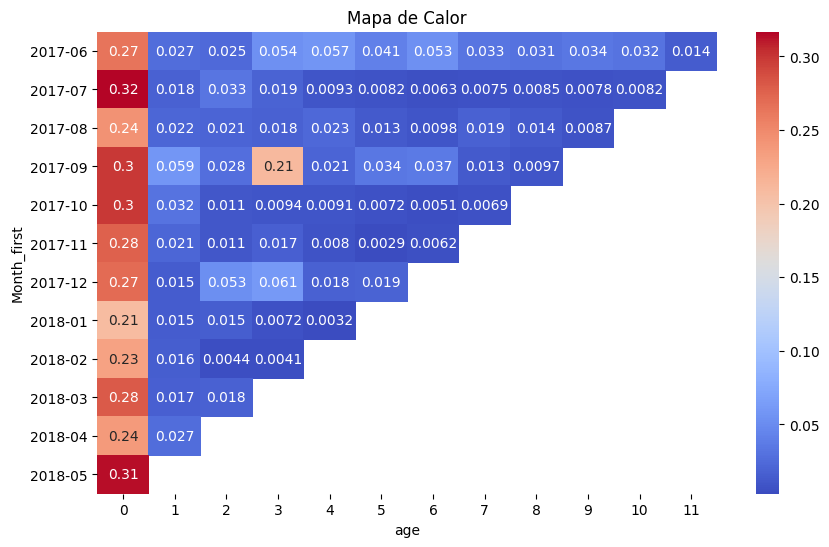

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(output_, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor Output_')
plt.show()

In [50]:
output_.cumsum(axis=1).mean(axis=0)

age
0     0.270408
1     0.290992
2     0.315535
3     0.359870
4     0.391473
5     0.429938
6     0.448410
7     0.484976
8     0.526936
9     0.482244
10    0.547329
11    0.666991
dtype: float64

Por lo visto ninguna de las cohortes muestran una compensacion de lo invertido, si va incrementando el valor mes con mes pero podemos determinar que durante todo este periodo no hubo ningun retorno de inversion. 

# Paso 3

Conclusiones:

Tras el analisis de los datos proporcionados podemos decir que la compañia tiene áreas de oportunidad en lo que respecta al destino de sus inversiones.

En el periodo estudiado pudimos ver una gran inclinacion a invertir mayormente en la fuente numero 3, teniendo una gran diferencia comparado al resto de las fuentes. Normalmente se consideraria buena inversion el asignar la mayor cantidad de inversion a la fuente que trajera mejores resultados, que en este caso viene siendo la captacion de clientes, pero la fuente 3 fue por mucho la fuente mas costosa por cliente captado, en contraste con las mas bajas la 10 y 9 con costos sumamente bajos comparado con la fuente 3. Aunque el hecho de que el resto de las fuentes tengan costos de captacion de clientes mas baja, es dificil deducir que realmente la cantidad de clientes nuevos sea proporcional al costo total por fuente.

Una recomendacion para la esta situacion es una mayor distribucion de costos a lo largo de todas las fuentes listadas. Con un informe detallado basandonos en parametros iniciales iguales, se puede llegar a una conclusion muchisimo mas fidedigna de que fuente se deberia de invertir mas para que el retorno de inversion se consiga de mejor manera.